In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

final_imputed_data=pd.read_csv("/kaggle/input/test-stock/final_imputed.csv")
final_imputed_data.head()

,Date,Unnamed: 0,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,02-02-2024,0.0,2.079,103180.0,72.28,341868.0,3.8215,57098.0,43194.7,42650.0,...,589498.0,10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,2053.7,190762.0
1,01-02-2024,1.0,2.050,161340.0,73.82,577940.0,3.8535,34040.0,43081.4,47690.0,...,581600.0,9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,2071.1,260920.0
2,31-01-2024,2.0,2.100,142860.0,75.85,344490.0,3.9060,89628.0,42580.5,56480.0,...,578020.0,9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,2067.4,238370.0
3,30-01-2024,3.0,2.077,139750.0,77.82,347240.0,3.9110,78758.0,42946.2,55130.0,...,584680.0,9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,2050.9,214590.0
4,29-01-2024,4.0,2.490,3590.0,76.78,331930.0,3.8790,76524.0,43299.8,45230.0,...,578800.0,13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,2034.9,1780.0


In [2]:
pridictors = final_imputed_data[['Date','Microsoft_Price','Apple_Price',  'Nasdaq_100_Price', 'Nvidia_Price','Google_Price','Berkshire_Price','S&P_500_Price']]
pridictors.head()

,Date,Microsoft_Price,Apple_Price,Nasdaq_100_Price,Nvidia_Price,Google_Price,Berkshire_Price,S&P_500_Price
0,02-02-2024,411.22,185.85,17642.73,661.60,142.38,589498.0,4958.61
1,01-02-2024,403.78,186.86,17344.71,630.27,141.16,581600.0,4906.19
2,31-01-2024,397.58,184.40,17137.24,615.27,140.10,578020.0,4848.87
3,30-01-2024,408.59,188.04,17476.71,627.74,151.46,584680.0,4924.97
4,29-01-2024,409.72,191.73,17596.27,624.65,153.51,578800.0,4927.93


In [3]:
#将日期设置为索引
pridictors.set_index('Date', inplace=True)
#设置日期索引格式为%Y-%m-%d
pridictors.index = pd.to_datetime(pridictors.index, format='%d-%m-%Y')

pridictors.head()

,Microsoft_Price,Apple_Price,Nasdaq_100_Price,Nvidia_Price,Google_Price,Berkshire_Price,S&P_500_Price
Date,,,,,,,
2024-02-02,411.22,185.85,17642.73,661.60,142.38,589498.0,4958.61
2024-02-01,403.78,186.86,17344.71,630.27,141.16,581600.0,4906.19
2024-01-31,397.58,184.40,17137.24,615.27,140.10,578020.0,4848.87
2024-01-30,408.59,188.04,17476.71,627.74,151.46,584680.0,4924.97
2024-01-29,409.72,191.73,17596.27,624.65,153.51,578800.0,4927.93


In [4]:
#逆序排列
pridictors = pridictors.iloc[::-1]
pridictors.head()

,Microsoft_Price,Apple_Price,Nasdaq_100_Price,Nvidia_Price,Google_Price,Berkshire_Price,S&P_500_Price
Date,,,,,,,
2020-01-02,160.62,75.09,8872.22,59.98,68.43,342261.0,3257.85
2020-01-03,158.62,74.36,8793.90,59.02,68.08,339155.0,3234.85
2020-01-06,159.03,74.95,8848.51,59.27,69.89,340210.0,3246.28
2020-01-07,157.58,74.60,8846.45,59.98,69.76,338901.0,3237.18
2020-01-08,160.09,75.80,8912.37,60.09,70.25,339188.0,3253.05


MSE: 1763.34
R2: -1.16


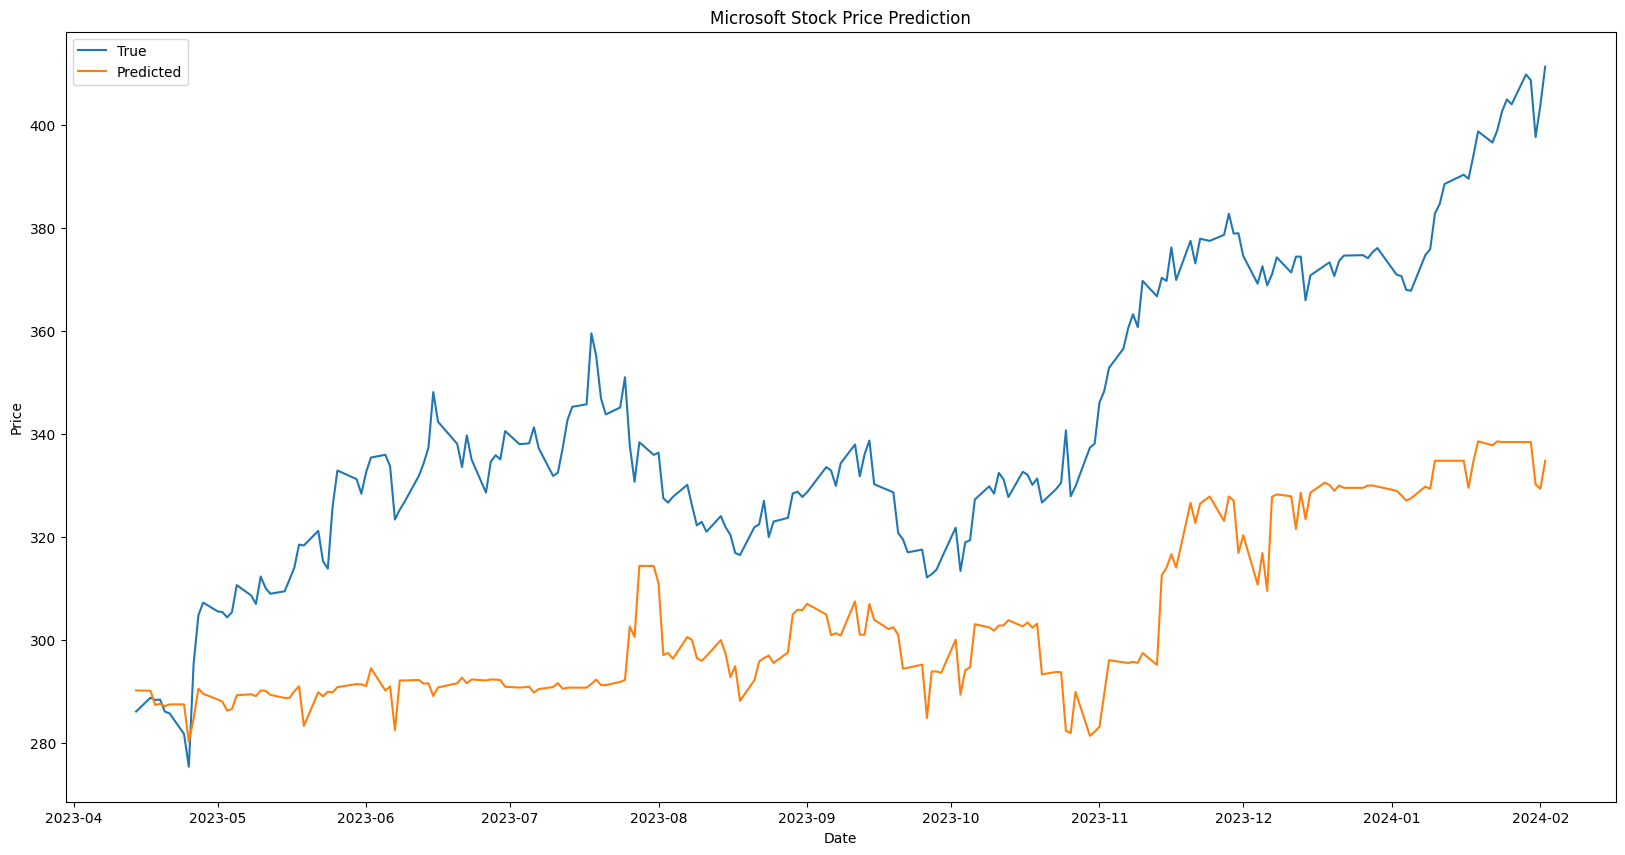

In [5]:
#使用xgboost预测，将其他股票价格作为预测因子预测微软股票价格
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib as plt
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

#将数据集分为训练集和测试集
train, test = train_test_split(pridictors, test_size=0.2, shuffle=False)


#将数据集分为特征和标签
X_train = train.drop('Microsoft_Price', axis=1)
y_train = train['Microsoft_Price']
X_test = test.drop('Microsoft_Price', axis=1)
y_test = test['Microsoft_Price']


#xgboost模型
model = XGBRegressor()
model.fit(X_train, y_train)

#预测
y_pred = model.predict(X_test)

#计算均方误差
mse = mean_squared_error(y_test, y_pred)
print('MSE: %.2f' % mse)

#计算R2
r2 = r2_score(y_test, y_pred)
print('R2: %.2f' % r2)

#绘制预测结果
plt.figure(figsize=(20, 10))
plt.plot(y_test.index, y_test.values, label='True')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [6]:
#保存xgboost模型的预测结果
xgboost_result = test.copy()
xgboost_result['Predicted_Microsoft_Price'] = y_pred
xgboost_result.to_csv('xgboost_result.csv')

xgboost的结果不是很好,尝试一下其他模型的拟合

2024-03-20 06:45:51.615082: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-20 06:45:51.615189: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-20 06:45:51.796658: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        11,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,451 (44.73 KB)

 Trainable params: 11,451 (44.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
 1/26 ━━━━━━━━━━━━━━━━━━━━ 1:11 3s/step - loss: 0.1672 - root_mean_squared_error: 0.4089

I0000 00:00:1710917167.591274      80 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 0.0693 - root_mean_squared_error: 0.2540 - val_loss: 0.0494 - val_root_mean_squared_error: 0.2117
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0033 - root_mean_squared_error: 0.0572 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0795
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011 - root_mean_squared_error: 0.0333 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0509
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.9717e-04 - root_mean_squared_error: 0.0316 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0582
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.6438e-04 - root_mean_squared_error: 0.0294 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0592
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.7829e-04 - root_mean_squared_error: 0.0296 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0505
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss

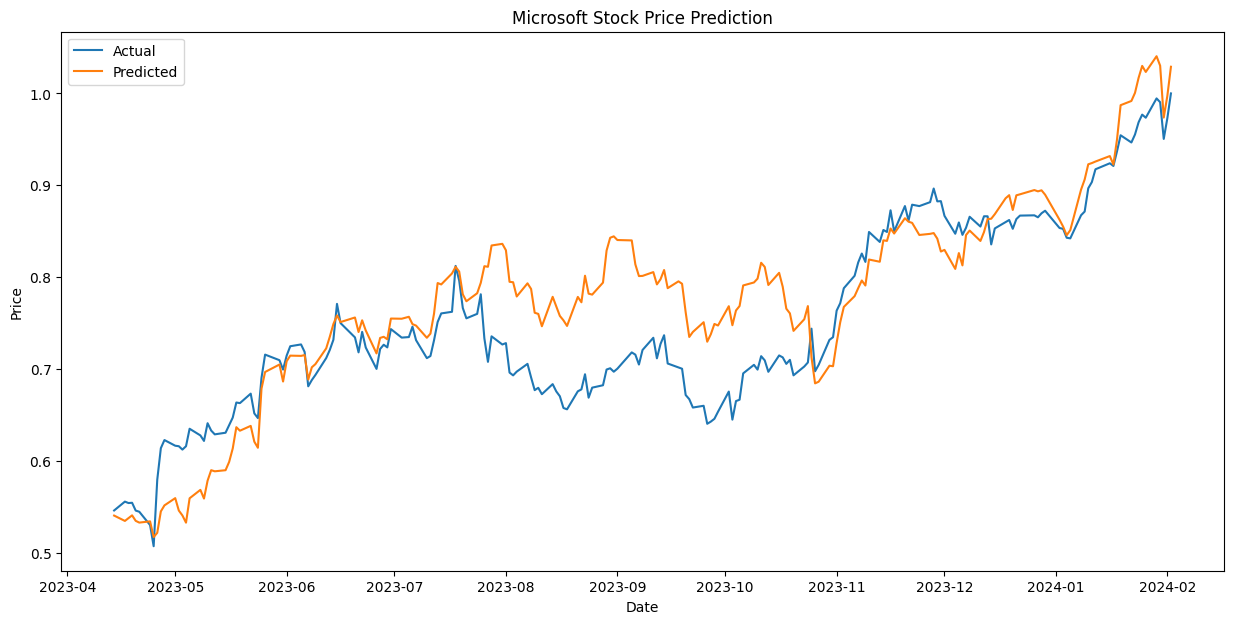

In [7]:
#使用lstm预测，将其他股票价格作为预测因子预测微软股票价格
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.callbacks import EarlyStopping

#将数据集标准化
scaler = MinMaxScaler()
standard_pridictors = pd.DataFrame(scaler.fit_transform(pridictors), columns=pridictors.columns, index=pridictors.index)

#将数据集分为训练集和测试集
train, test = train_test_split(standard_pridictors, test_size=0.2, shuffle=False)

#将数据集分为特征和标签
X_train = train.drop('Microsoft_Price', axis=1)
y_train = train['Microsoft_Price']
X_test = test.drop('Microsoft_Price', axis=1)
y_test = test['Microsoft_Price']

#将数据集转换为lstm输入格式
X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

#创建lstm模型
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.01), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])
model.summary()

#拟合模型
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=10)], verbose=1)

#预测
y_pred = model.predict(X_test)

#计算评估指标
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

#绘制预测结果
plt.figure(figsize=(15, 7))

plt.plot(test.index, y_test, label='Actual')
plt.plot(test.index, y_pred, label='Predicted')

plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


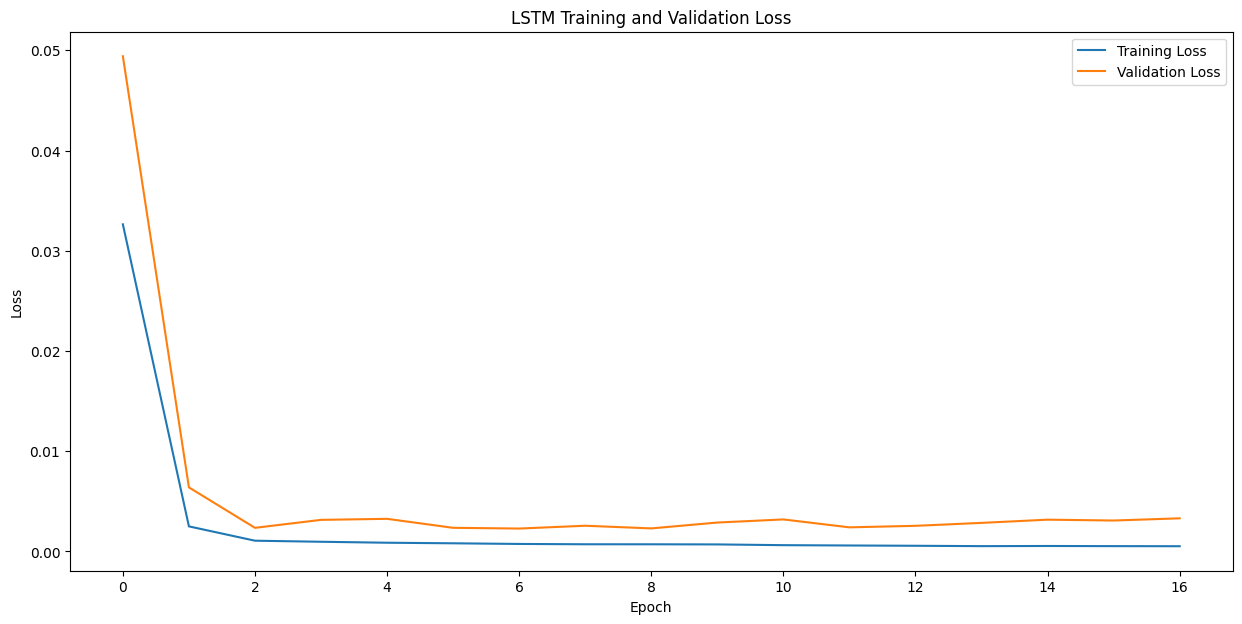

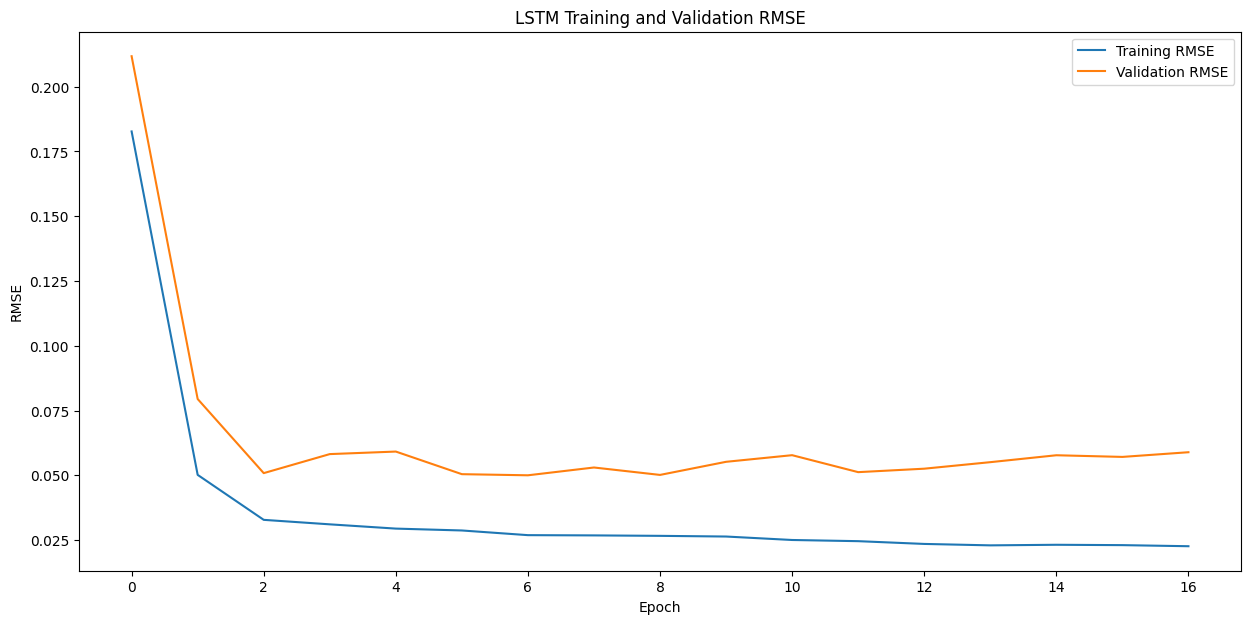

In [8]:
#绘制lstm的训练和验证损失
plt.figure(figsize=(15, 7))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('LSTM Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#绘制lstm的训练和验证rmse
plt.figure(figsize=(15, 7))

plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')

plt.title('LSTM Training and Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [9]:
#将lstm的预测结果写入csv文件
lstm_result = test.copy()
lstm_result['Predicted_Microsoft_Price'] = y_pred
lstm_result.to_csv('lstm_result.csv')

尝试使用knn

Mean Squared Error: 0.012222809561889526
R2 Score: 0.7242796269797708


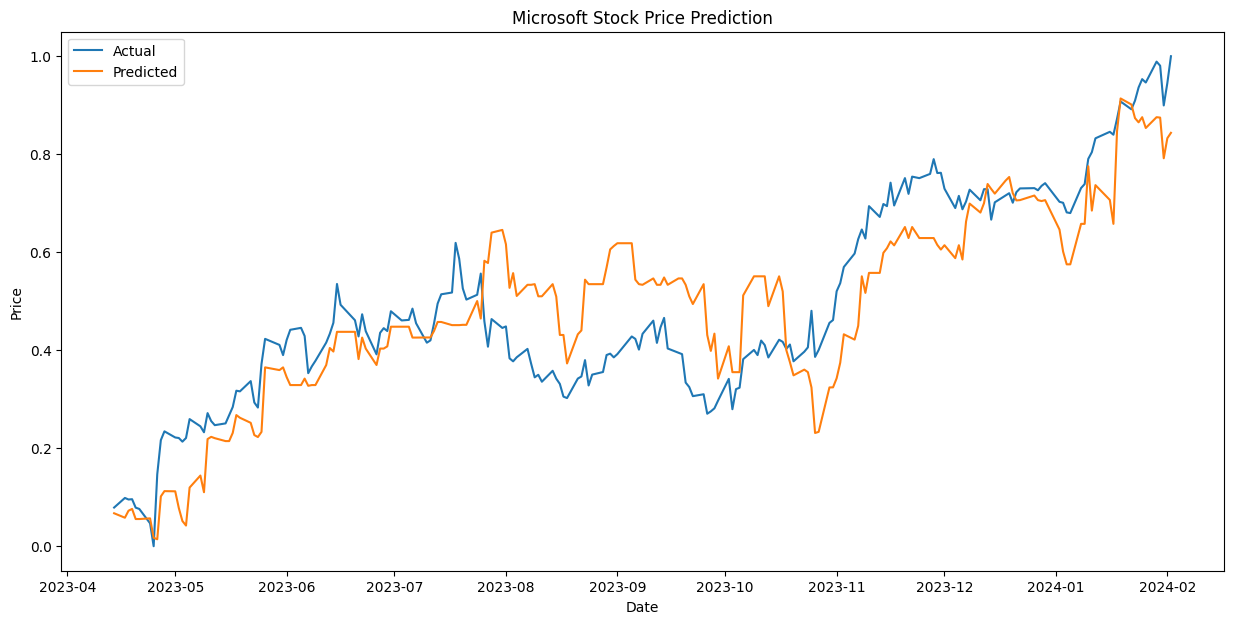

In [10]:
#使用knn预测，将其他股票价格作为预测因子预测微软股票价格
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

#将数据集分为训练集和测试集，并将数据集标准化
train, test = train_test_split(pridictors, test_size=0.2, shuffle=False)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train.drop('Microsoft_Price', axis=1))
y_train=scaler.fit_transform(train['Microsoft_Price'].values.reshape(-1,1))
X_test = scaler.fit_transform(test.drop('Microsoft_Price', axis=1))
y_test=scaler.fit_transform(test['Microsoft_Price'].values.reshape(-1,1))

#创建knn回归模型
model = KNeighborsRegressor(n_neighbors=5)

#拟合模型
model.fit(X_train, y_train)

#预测
y_pred = model.predict(X_test)

#计算评估指标
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

#绘制预测结果
plt.figure(figsize=(15, 7))

plt.plot(test.index, y_test, label='Actual')
plt.plot(test.index, y_pred, label='Predicted')

plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [11]:
#保存knn的预测结果
knn_pred = pd.DataFrame({'Date': test.index, 'Actual': y_test.flatten(), 'knn_Predicted': y_pred.flatten()})
knn_pred.to_csv('knn_pred.csv', index=False)

### 尝试使用cnn预测

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 5, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 2, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         6,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,693 (26.14 KB)

 Trainable params: 6,693 (26.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.0464 - root_mean_squared_error: 0.1971 - val_loss: 0.0381 - val_root_mean_squared_error: 0.1833
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015 - root_mean_squared_error: 0.0383 - val_loss: 0.0216 - val_root_mean_squared_error: 0.1361
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0010 - root_mean_squared_error: 0.0320 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0888
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011 - root_mean_squared_error: 0.0337 - val_loss: 0.0190 - val_root_mean_squared_error: 0.1269
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011 - root_mean_squared_error: 0.0325 - val_loss: 0.0178 - val_root_mean_squared_error: 0.1235
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.6023e-04 - root_mean_squared_error: 0.0276 - val_loss: 0.0167 - val_root_mean_squared_error: 0.1186
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

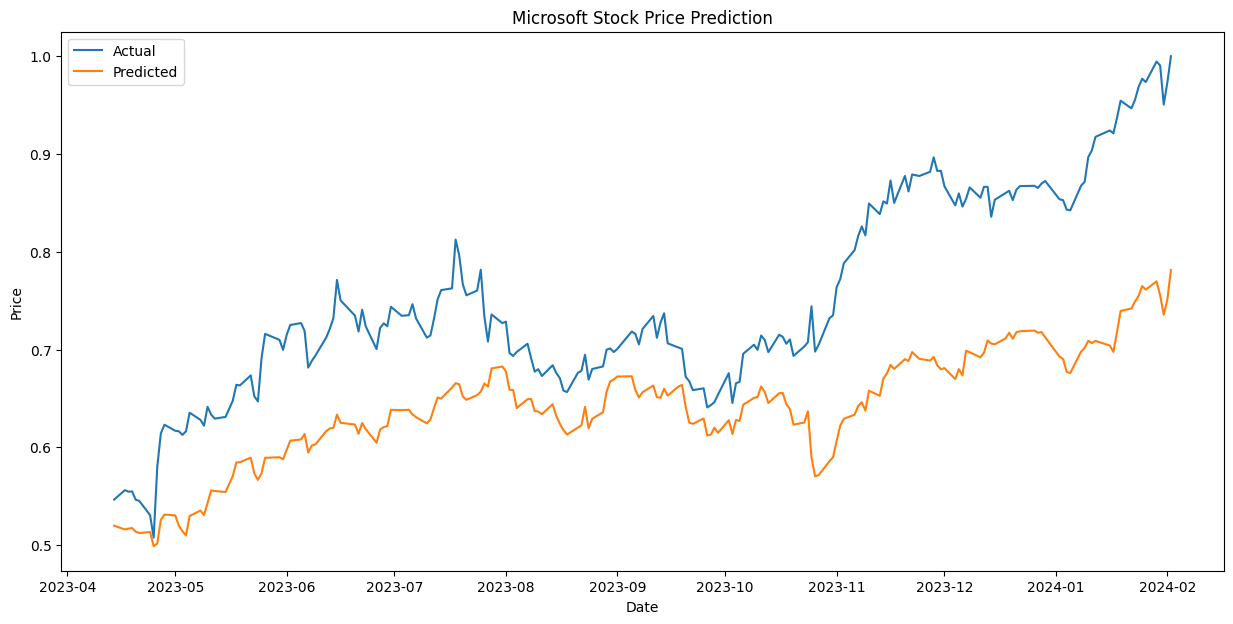

In [12]:
#使用cnn预测，将其他股票价格作为预测因子预测微软股票价格
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.callbacks import EarlyStopping

#将数据集标准化
scaler = MinMaxScaler()
standard_pridictors = pd.DataFrame(scaler.fit_transform(pridictors), columns=pridictors.columns, index=pridictors.index)

#将数据集分为训练集和测试集
train, test = train_test_split(standard_pridictors, test_size=0.2, shuffle=False)

#将数据集分为特征和标签
X_train = train.drop('Microsoft_Price', axis=1)
y_train = train['Microsoft_Price']
X_test = test.drop('Microsoft_Price', axis=1)
y_test = test['Microsoft_Price']

#将数据集转换为cnn输入格式
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

#创建cnn模型
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.01), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])
model.summary()

#拟合模型
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=10)], verbose=1)

#预测
y_pred = model.predict(X_test)

#计算评估指标
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

#绘制预测结果
plt.figure(figsize=(15, 7))

plt.plot(test.index, y_test, label='Actual')
plt.plot(test.index, y_pred, label='Predicted')

plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

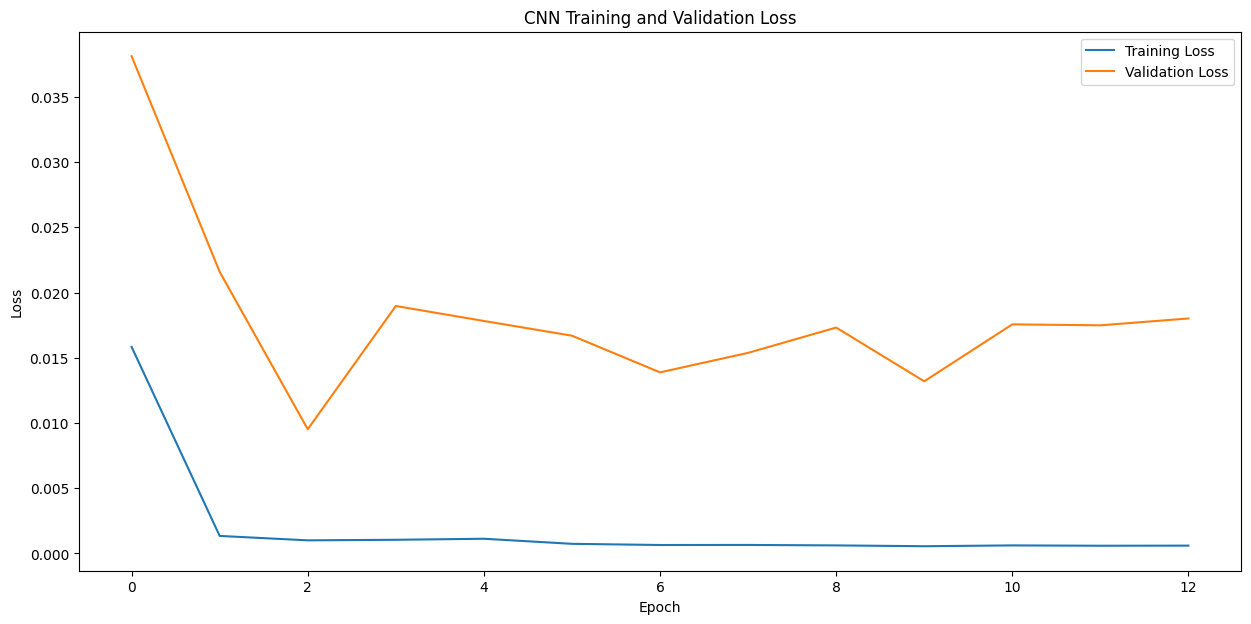

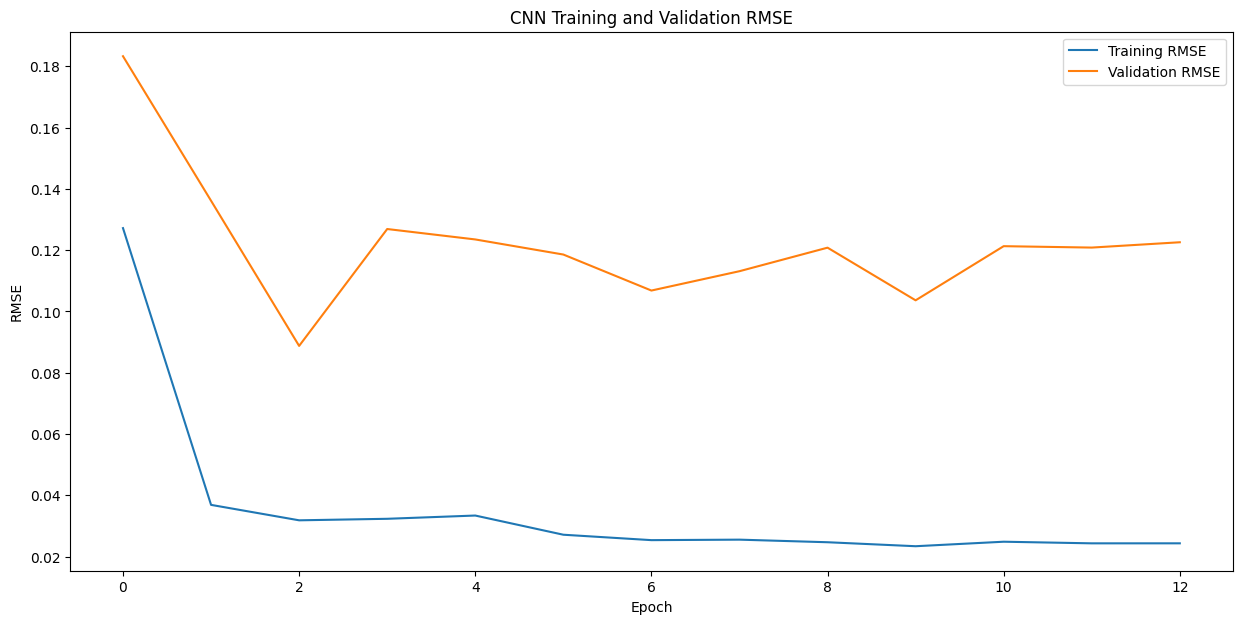

In [13]:
#绘制cnn的训练和验证损失
plt.figure(figsize=(15, 7))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('CNN Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#绘制cnn的训练和验证rmse
plt.figure(figsize=(15, 7))

plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')

plt.title('CNN Training and Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [14]:
#将cnn的预测结果写入csv文件
cnn_pred = pd.DataFrame({'Date': test.index, 'Actual': y_test, 'cnn_Predicted': y_pred.flatten()})
cnn_pred.to_csv('cnn_pred.csv', index=False)


### 尝试使用rnn模型预测

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,901 (11.33 KB)

 Trainable params: 2,901 (11.33 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.1849
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0072
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011     
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.8780e-04
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.6526e-04 
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.5607e-04 
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8803e-04 
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5685e-04 
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4846e-04 
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.5974e-04 
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8174e-04 
Epoch 13/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.6744e-04 
Epoch 14/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.6320e-04 
Epoch 15/100
26

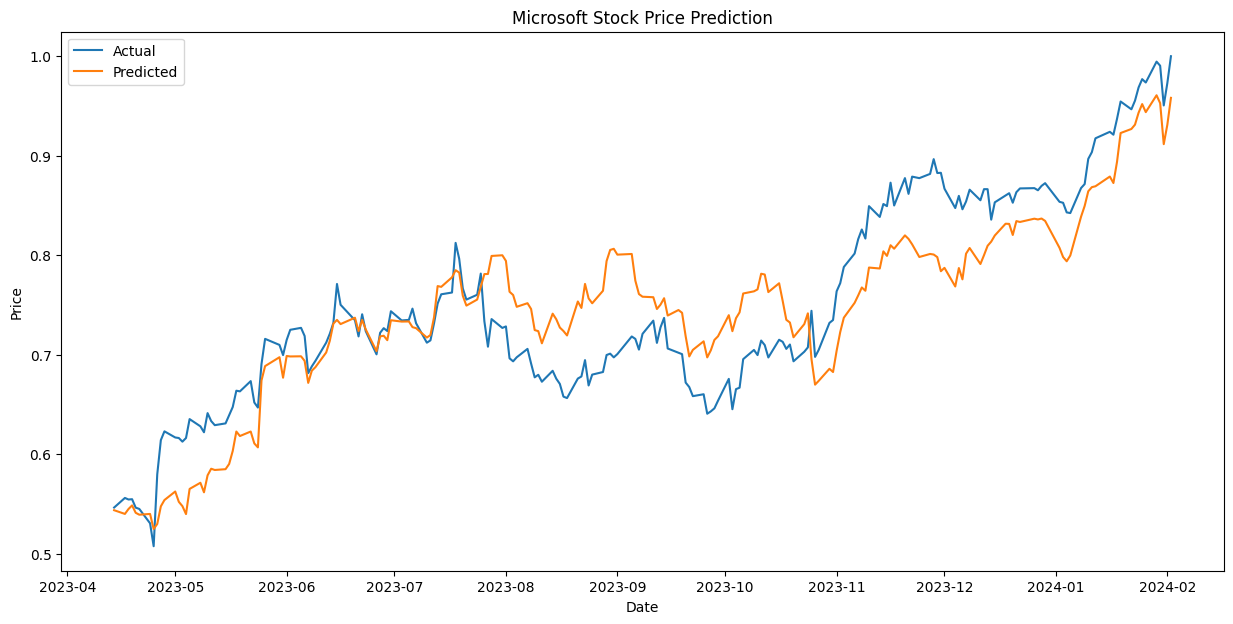

In [15]:
#使用rnn预测，将其他股票价格作为预测因子预测微软股票价格
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.optimizers import Adam

#将数据集标准化
scaler = MinMaxScaler()
standard_pridictors = pd.DataFrame(scaler.fit_transform(pridictors), columns=pridictors.columns, index=pridictors.index)

#将数据集分为训练集和测试集
train, test = train_test_split(standard_pridictors, test_size=0.2, shuffle=False)

#将数据集分为特征和标签
X_train = train.drop('Microsoft_Price', axis=1)
y_train = train['Microsoft_Price']
X_test = test.drop('Microsoft_Price', axis=1)
y_test = test['Microsoft_Price']

#将数据集转换为rnn输入格式
X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

#创建rnn模型
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
model.summary()

#拟合模型
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

#预测
y_pred = model.predict(X_test)

#计算评估指标
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

#绘制预测结果
plt.figure(figsize=(15, 7))

plt.plot(test.index, y_test, label='Actual')
plt.plot(test.index, y_pred, label='Predicted')

plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [16]:
#将rnn的预测结果写入csv文件
rnn_pred = pd.DataFrame({'Date': test.index, 'Actual': y_test, 'rnn_Predicted': y_pred.flatten()})
rnn_pred.to_csv('rnn_pred.csv', index=False)


In [17]:
#综合对比一下各种模型的预测结果
lstm_pred = pd.read_csv('/kaggle/working/lstm_result.csv')
knn_pred = pd.read_csv('/kaggle/working/knn_pred.csv')
cnn_pred = pd.read_csv('/kaggle/working/cnn_pred.csv')
rnn_pred = pd.read_csv('/kaggle/working/rnn_pred.csv')
xgboost_pred = pd.read_csv('/kaggle/working/xgboost_result.csv')


#将各种模型的预测结果合并
combined_pred = pd.merge(lstm_pred, knn_pred, on='Date')
combined_pred = pd.merge(combined_pred, cnn_pred, on='Date')
combined_pred = pd.merge(combined_pred, rnn_pred, on='Date')


#drop多余的列
combined_pred.drop(['Actual_y'], axis=1, inplace=True)
combined_pred.drop(['Actual_x'], axis=1, inplace=True)
combined_pred['Xgboost_Predicted'] = xgboost_pred['Predicted_Microsoft_Price']
combined_pred['lstm_Predicted'] = lstm_pred['Predicted_Microsoft_Price']
combined_pred['Actual'] = xgboost_pred['Microsoft_Price']

combined_pred.head()



,Date,Microsoft_Price,Apple_Price,Nasdaq_100_Price,Nvidia_Price,Google_Price,Berkshire_Price,S&P_500_Price,Predicted_Microsoft_Price,knn_Predicted,cnn_Predicted,Actual,rnn_Predicted,Xgboost_Predicted,lstm_Predicted
0,2023-04-14,0.546483,0.768342,0.571467,0.356702,0.557143,0.732479,0.698307,0.540948,0.067254,0.519786,286.14,0.543803,290.23105,0.540948
1,2023-04-17,0.556128,0.768483,0.572236,0.360686,0.528373,0.737916,0.703334,0.535119,0.058173,0.515908,288.80,0.540073,290.14932,0.535119
2,2023-04-18,0.554569,0.777214,0.572619,0.371543,0.513790,0.733051,0.704639,0.538214,0.072396,0.516786,288.37,0.545003,287.39910,0.538214
3,2023-04-19,0.554859,0.785382,0.572331,0.375853,0.510615,0.729469,0.704510,0.541189,0.076133,0.517388,288.45,0.548636,287.62250,0.541189
4,2023-04-20,0.546374,0.778482,0.562682,0.362351,0.521627,0.733338,0.695422,0.535226,0.055487,0.513695,286.11,0.541216,287.16934,0.535226


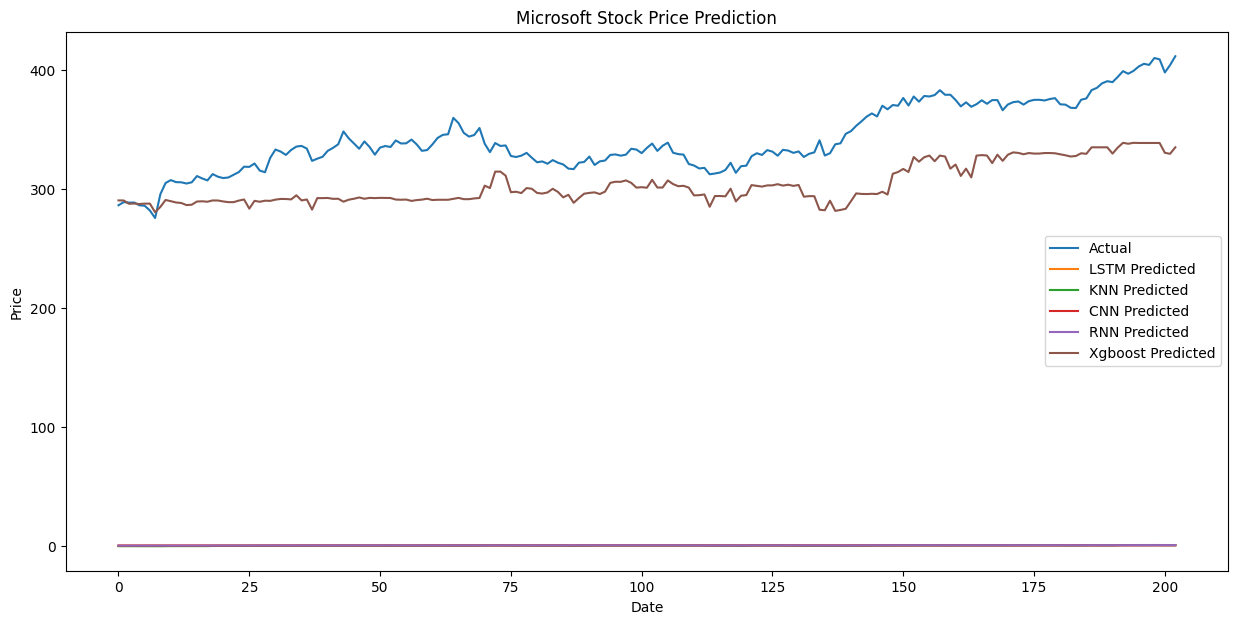

In [18]:
#绘制对比各种模型的预测结果
plt.figure(figsize=(15, 7))

plt.plot(combined_pred.index, combined_pred['Actual'], label='Actual')
plt.plot(combined_pred.index, combined_pred['lstm_Predicted'], label='LSTM Predicted')
plt.plot(combined_pred.index, combined_pred['knn_Predicted'], label='KNN Predicted')
plt.plot(combined_pred.index, combined_pred['cnn_Predicted'], label='CNN Predicted')
plt.plot(combined_pred.index, combined_pred['rnn_Predicted'], label='RNN Predicted')
plt.plot(combined_pred.index, combined_pred['Xgboost_Predicted'], label='Xgboost Predicted')

plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [19]:
#将各个模型的评估指标放在一张表中进行对比
actual = combined_pred['Actual']
lstm_pred = combined_pred['lstm_Predicted']
knn_pred = combined_pred['knn_Predicted']
cnn_pred = combined_pred['cnn_Predicted']
rnn_pred = combined_pred['rnn_Predicted']
xgboost_pred = combined_pred['Xgboost_Predicted']

mse_lstm = mean_squared_error(actual, lstm_pred)
r2_lstm = r2_score(actual, lstm_pred)

mse_knn = mean_squared_error(actual, knn_pred)
r2_knn = r2_score(actual, knn_pred)

mse_cnn = mean_squared_error(actual, cnn_pred)
r2_cnn = r2_score(actual, cnn_pred)

mse_rnn = mean_squared_error(actual, rnn_pred)
r2_rnn = r2_score(actual, rnn_pred)

mse_xgboost = mean_squared_error(actual, xgboost_pred)
r2_xgboost = r2_score(actual, xgboost_pred)

evaluation = pd.DataFrame({'Model': ['LSTM', 'KNN', 'CNN', 'RNN', 'Xgboost'],
                            'Mean Squared Error': [mse_lstm, mse_knn, mse_cnn, mse_rnn, mse_xgboost],
                            'R2 Score': [r2_lstm, r2_knn, r2_cnn, r2_rnn, r2_xgboost]})
evaluation

,Model,Mean Squared Error,R2 Score
0,LSTM,117060.173036,-142.188267
1,KNN,117257.065585,-142.429107
2,CNN,117153.925347,-142.302945
3,RNN,117082.322686,-142.215361
4,Xgboost,1763.344028,-1.156926


In [20]:
pridictors

,Microsoft_Price,Apple_Price,Nasdaq_100_Price,Nvidia_Price,Google_Price,Berkshire_Price,S&P_500_Price
Date,,,,,,,
2020-01-02,160.62,75.09,8872.22,59.98,68.43,342261.0,3257.85
2020-01-03,158.62,74.36,8793.90,59.02,68.08,339155.0,3234.85
2020-01-06,159.03,74.95,8848.51,59.27,69.89,340210.0,3246.28
2020-01-07,157.58,74.60,8846.45,59.98,69.76,338901.0,3237.18
2020-01-08,160.09,75.80,8912.37,60.09,70.25,339188.0,3253.05
...,...,...,...,...,...,...,...
2024-01-29,409.72,191.73,17596.27,624.65,153.51,578800.0,4927.93
2024-01-30,408.59,188.04,17476.71,627.74,151.46,584680.0,4924.97
2024-01-31,397.58,184.40,17137.24,615.27,140.10,578020.0,4848.87


### arima的预测效果太差了

In [21]:
pridictors.head()

,Microsoft_Price,Apple_Price,Nasdaq_100_Price,Nvidia_Price,Google_Price,Berkshire_Price,S&P_500_Price
Date,,,,,,,
2020-01-02,160.62,75.09,8872.22,59.98,68.43,342261.0,3257.85
2020-01-03,158.62,74.36,8793.90,59.02,68.08,339155.0,3234.85
2020-01-06,159.03,74.95,8848.51,59.27,69.89,340210.0,3246.28
2020-01-07,157.58,74.60,8846.45,59.98,69.76,338901.0,3237.18
2020-01-08,160.09,75.80,8912.37,60.09,70.25,339188.0,3253.05


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=4.78 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5359.152, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5160.943, Time=0.66 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.98 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5358.536, Time=0.12 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5057.933, Time=1.37 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=7.67 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=4.82 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5064.107, Time=1.15 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=5059.931, Time=2.11 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=8.64 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5057.924, Time=1.61 sec
 ARIMA(0,1,1)(1,1,0)[12]            

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Squared Error: 6604.11326045211
R2 Score: -7.078166217298346


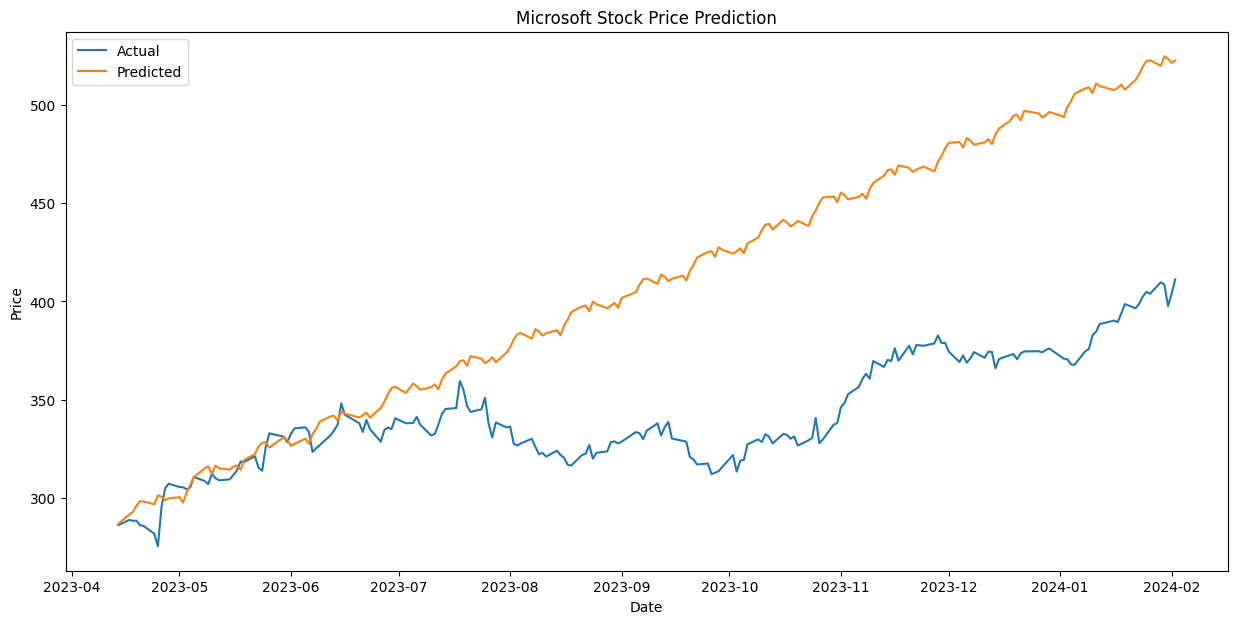

In [22]:
%pip install pmdarima
#使用arima模型预测微软股票价格
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

#读取数据
data = pridictors

#将数据集分为训练集和测试集
train, test = train_test_split(data, test_size=0.2, shuffle=False)

#创建arima模型
model = auto_arima(train['Microsoft_Price'], start_p=1, start_q=1, max_p=5, max_q=5, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

#拟合模型
model.fit(train['Microsoft_Price'])

#预测
y_pred = model.predict(n_periods=len(test))

#计算评估指标
mse = mean_squared_error(test['Microsoft_Price'], y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(test['Microsoft_Price'], y_pred)
print(f'R2 Score: {r2}')

#绘制预测结果
plt.figure(figsize=(15, 7))

plt.plot(test.index, test['Microsoft_Price'], label='Actual')
plt.plot(test.index, y_pred, label='Predicted')

plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        11,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,451 (44.73 KB)

 Trainable params: 11,451 (44.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0619 - root_mean_squared_error: 0.2394 - val_loss: 0.0385 - val_root_mean_squared_error: 0.1857
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036 - root_mean_squared_error: 0.0594 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0630
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015 - root_mean_squared_error: 0.0384 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0576
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0010 - root_mean_squared_error: 0.0322 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0494
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.0586e-04 - root_mean_squared_error: 0.0301 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0492
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.3790e-04 - root_mean_squared_error: 0.0306 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0493
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

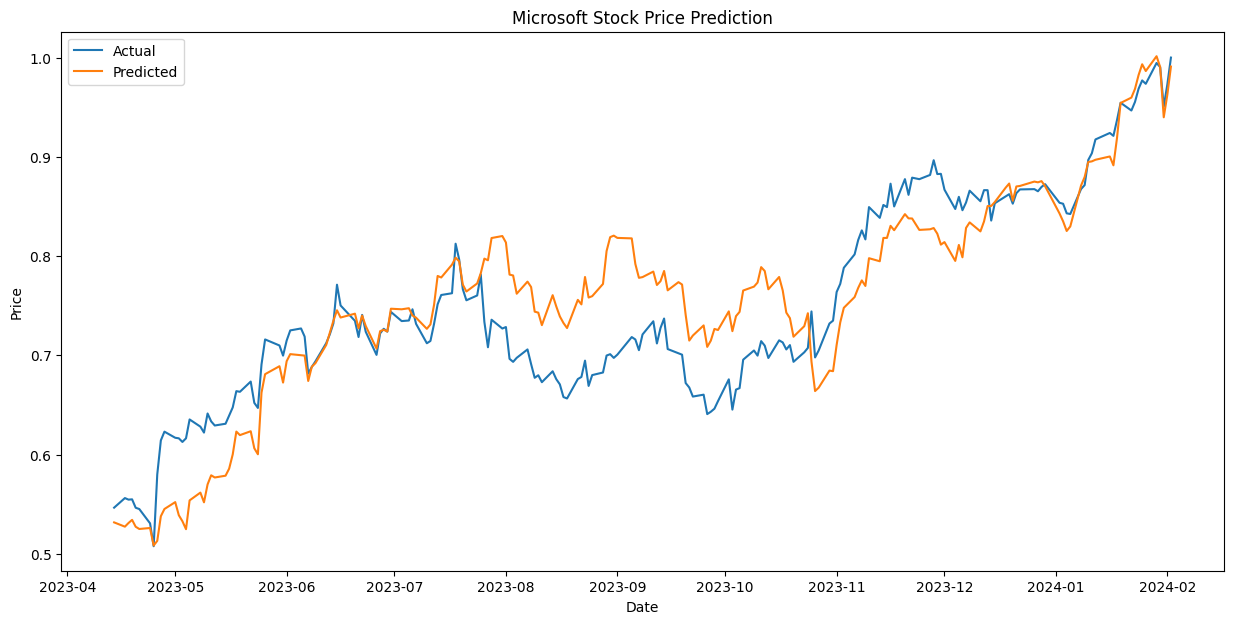

In [23]:
#使用lstm预测，将其他股票价格作为预测因子预测微软股票价格
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.callbacks import EarlyStopping

#将数据集标准化
scaler = MinMaxScaler()
standard_pridictors = pd.DataFrame(scaler.fit_transform(pridictors), columns=pridictors.columns, index=pridictors.index)

#将数据集分为训练集和测试集
train, test = train_test_split(standard_pridictors, test_size=0.2, shuffle=False)

#将数据集分为特征和标签
X_train = train.drop('Microsoft_Price', axis=1)
y_train = train['Microsoft_Price']
X_test = test.drop('Microsoft_Price', axis=1)
y_test = test['Microsoft_Price']

#将数据集转换为lstm输入格式
X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

#创建lstm模型
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.01), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])
model.summary()

#拟合模型
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=10)], verbose=1)

#预测
y_pred = model.predict(X_test)

#计算评估指标
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

#绘制预测结果
plt.figure(figsize=(15, 7))

plt.plot(test.index, y_test, label='Actual')
plt.plot(test.index, y_pred, label='Predicted')

plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [24]:
# Predict the next 30 days of stock prices
future_prices = []
current_features = X_test[-1]

for i in range(5):
    # Reshape for the model prediction
    current_features_reshaped = current_features.reshape(1, -1, 6)
    # Predict the future price
    future_price = model.predict(current_features_reshaped)[0][0]
    # Append the predicted price to the future_prices list
    future_prices.append(future_price)
    # Update the current_features to include the predicted price
    current_features = np.roll(current_features, -1)  # Shift the window
    current_features[-1] = future_price  # Add the predicted price at the end

future_prices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[0.99095976, 1.0284222, 1.075977, 1.137601, 1.2195213]

In [25]:
#将预测结果转化为dataframe
future_prices_df = pd.DataFrame(future_prices, columns=['Predicted_Price'])
future_prices_df.index = pd.date_range(start=pridictors.index[-1], periods=5, freq='D')
future_prices_df.index.name = 'Date'
future_prices_df


,Predicted_Price
Date,
2024-02-02,0.990960
2024-02-03,1.028422
2024-02-04,1.075977
2024-02-05,1.137601
2024-02-06,1.219521


In [26]:
pridictors['Microsoft_Price'].tail(30)

Date
2023-12-20    370.62
2023-12-21    373.54
2023-12-22    374.58
2023-12-26    374.66
2023-12-27    374.07
2023-12-28    375.28
2023-12-29    376.04
2024-01-02    370.87
2024-01-03    370.60
2024-01-04    367.94
2024-01-05    367.75
2024-01-08    374.69
2024-01-09    375.79
2024-01-10    382.77
2024-01-11    384.63
2024-01-12    388.47
2024-01-16    390.27
2024-01-17    389.47
2024-01-18    393.87
2024-01-19    398.67
2024-01-22    396.51
2024-01-23    398.90
2024-01-24    402.56
2024-01-25    404.87
2024-01-26    403.93
2024-01-29    409.72
2024-01-30    408.59
2024-01-31    397.58
2024-02-01    403.78
2024-02-02    411.22
Name: Microsoft_Price, dtype: float64

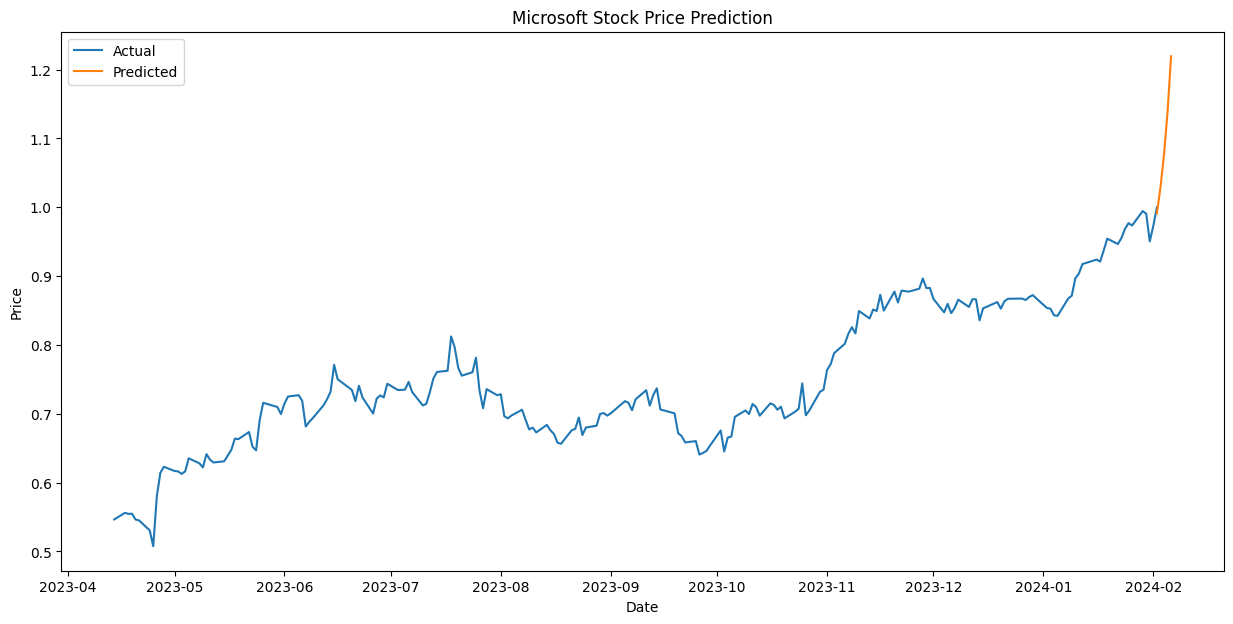

In [27]:
#绘制预测结果
plt.figure(figsize=(15, 7))

plt.plot(y_test, label='Actual')
plt.plot(future_prices_df, label='Predicted')

plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [28]:
pridictors.head()

,Microsoft_Price,Apple_Price,Nasdaq_100_Price,Nvidia_Price,Google_Price,Berkshire_Price,S&P_500_Price
Date,,,,,,,
2020-01-02,160.62,75.09,8872.22,59.98,68.43,342261.0,3257.85
2020-01-03,158.62,74.36,8793.90,59.02,68.08,339155.0,3234.85
2020-01-06,159.03,74.95,8848.51,59.27,69.89,340210.0,3246.28
2020-01-07,157.58,74.60,8846.45,59.98,69.76,338901.0,3237.18
2020-01-08,160.09,75.80,8912.37,60.09,70.25,339188.0,3253.05


### 考虑使用多元线性回归预测，将RNN和XGboost作为基层输出到线性回归模型进行堆叠

In [29]:
#考虑使用多元线性回归预测，将RNN和XGboost作为基层输出到线性回归模型进行堆叠

#将数据集标准化
scaler = MinMaxScaler()
standard_pridictors = pd.DataFrame(scaler.fit_transform(pridictors), columns=pridictors.columns, index=pridictors.index)

#将数据集分为训练集和测试集
train, test = train_test_split(standard_pridictors, test_size=0.2, shuffle=False)

#将数据集分为特征和标签
X_train = train.drop('Microsoft_Price', axis=1)
y_train = train['Microsoft_Price']
X_test = test.drop('Microsoft_Price', axis=1)
y_test = test['Microsoft_Price']

#lstm模型
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer=Adam(learning_rate=0.01), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=10)], verbose=1)
lstm_pred = lstm_model.predict(X_test)
#打印lstm模型的评估指标
mse = mean_squared_error(y_test, lstm_pred)
print(f'Mean Squared Error of lstm: {mse}')
r2 = r2_score(y_test, lstm_pred)
print(f'R2 Score of lstm: {r2}')


#rnn模型
rnn_model = Sequential()
rnn_model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer=Adam(learning_rate=0.01), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])
rnn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=10)], verbose=1)
rnn_pred = rnn_model.predict(X_test)

#打印rnn模型的评估指标
mse = mean_squared_error(y_test, rnn_pred)
print(f'Mean Squared Error of rnn: {mse}')
r2 = r2_score(y_test, rnn_pred)
print(f'R2 Score of rnn: {r2}')


Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 0.0405 - root_mean_squared_error: 0.1928 - val_loss: 0.0159 - val_root_mean_squared_error: 0.1196
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - root_mean_squared_error: 0.0435 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0967
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017 - root_mean_squared_error: 0.0416 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0667
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - root_mean_squared_error: 0.0366 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0673
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - root_mean_squared_error: 0.0363 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0501
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014 - root_mean_squared_error: 0.0379 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0495
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - 

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0837 - root_mean_squared_error: 0.2722 - val_loss: 0.0337 - val_root_mean_squared_error: 0.1733
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - root_mean_squared_error: 0.0517 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0786
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016 - root_mean_squared_error: 0.0400 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0597
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014 - root_mean_squared_error: 0.0369 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0530
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - root_mean_squared_error: 0.0353 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0572
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 - root_mean_squared_error: 0.0350 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0515
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - r

In [30]:
lstm_pred

array([[0.5363173 ],
       [0.530328  ],
       [0.53141606],
       [0.5332203 ],
       [0.5302285 ],
       [0.528481  ],
       [0.53032523],
       [0.5161802 ],
       [0.52057123],
       [0.54343075],
       [0.5488233 ],
       [0.55653   ],
       [0.5414086 ],
       [0.53507787],
       [0.53087556],
       [0.5517663 ],
       [0.56412256],
       [0.55765676],
       [0.571366  ],
       [0.5802072 ],
       [0.57724464],
       [0.58190286],
       [0.59274155],
       [0.60373366],
       [0.62540823],
       [0.62387806],
       [0.6234797 ],
       [0.6062098 ],
       [0.6001155 ],
       [0.66112864],
       [0.67654437],
       [0.6840101 ],
       [0.67313534],
       [0.6895419 ],
       [0.69211835],
       [0.6917923 ],
       [0.69542116],
       [0.67794824],
       [0.68744177],
       [0.68864256],
       [0.7004426 ],
       [0.7087659 ],
       [0.71620923],
       [0.7258249 ],
       [0.7183575 ],
       [0.7228733 ],
       [0.7102928 ],
       [0.721

In [31]:
#使用lstm和rnn的预测结果作为特征输入到线性回归模型
X_train = pd.DataFrame({'lstm': lstm_pred.flatten(), 'rnn': rnn_pred.flatten()})
y_train = y_test
X_test = pd.DataFrame({'lstm': lstm_pred.flatten(), 'rnn': rnn_pred.flatten()})
y_test = y_test



In [32]:
X_test, y_test

(         lstm       rnn
 0    0.536317  0.538591
 1    0.530328  0.534710
 2    0.531416  0.537388
 3    0.533220  0.540523
 4    0.530228  0.535508
 ..        ...       ...
 198  0.915401  0.919048
 199  0.907129  0.901696
 200  0.866655  0.855559
 201  0.881480  0.879723
 202  0.903431  0.926153
 
 [203 rows x 2 columns],
 Date
 2023-04-14    0.546483
 2023-04-17    0.556128
 2023-04-18    0.554569
 2023-04-19    0.554859
 2023-04-20    0.546374
                 ...   
 2024-01-29    0.994561
 2024-01-30    0.990464
 2024-01-31    0.950544
 2024-02-01    0.973024
 2024-02-02    1.000000
 Name: Microsoft_Price, Length: 203, dtype: float64)

In [33]:
#创建线性回归模型
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

#预测
y_pred = model.predict(X_test)

#计算评估指标
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

Mean Squared Error: 0.0016353970270167125
R2 Score: 0.8478366714531115


In [34]:
#预测未来5天的股票价格
future_prices = []
current_features = X_test.iloc[-1]

for i in range(5):
    # Predict the future price
    future_price = model.predict([current_features])[0]
    # Append the predicted price to the future_prices list
    future_prices.append(future_price)
    # Update the current_features to include the predicted price
    current_features = current_features.shift(-1)  # Shift the window
    current_features[-1] = future_price  # Add the predicted price at the end

future_prices

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/tmp/ipykernel_27/3601167390.py:12: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  current_features[-1] = future_price  # Add the predicted price at the end
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/tmp/ipykernel_27/3601167390.py:12: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  current_features[-

[1.0216587, 1.1746249, 1.3804555, 1.6412168, 1.9635892]

In [35]:
#将预测结果转化为dataframe
future_prices_df = pd.DataFrame(future_prices, columns=['Predicted_Price'])
future_prices_df.index = pd.date_range(start=pridictors.index[-1], periods=5, freq='D')
future_prices_df.index.name = 'Date'
future_prices_df

,Predicted_Price
Date,
2024-02-02,1.021659
2024-02-03,1.174625
2024-02-04,1.380455
2024-02-05,1.641217
2024-02-06,1.963589


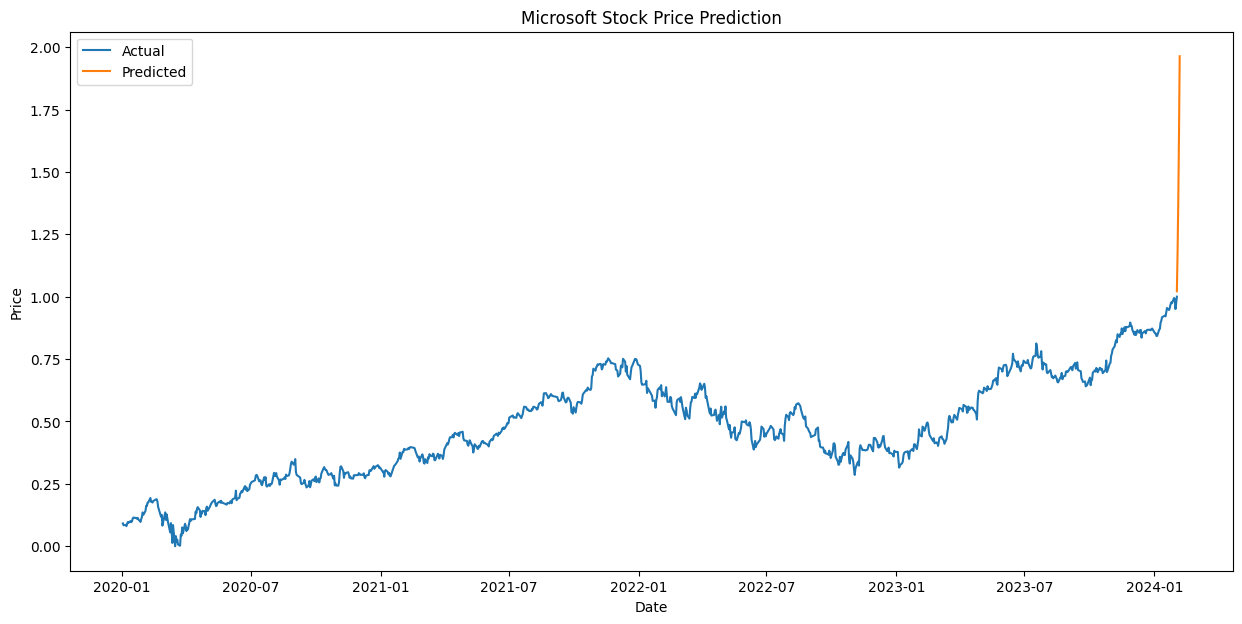

In [36]:
#绘制预测结果和实际结果
plt.figure(figsize=(15, 7))
plt.plot(standard_pridictors['Microsoft_Price'], label='Actual')
plt.plot(future_prices_df, label='Predicted')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [37]:
#单独使用多元线性回归模型预测未来30天的股票价格

#将数据集分为训练集和测试集

train, test = train_test_split(pridictors, test_size=0.2, shuffle=False)

#将数据集分为特征和标签
X_train = train.drop('Microsoft_Price', axis=1)
y_train = train['Microsoft_Price']
X_test = test.drop('Microsoft_Price', axis=1)
y_test = test['Microsoft_Price']

#创建线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

#预测
y_pred = model.predict(X_test)

#计算评估指标
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')



Mean Squared Error: 234.30967392448696
R2 Score: 0.7133918790251936


In [38]:
#预测未来5天的股票价格
future_prices = []
current_features = X_test.iloc[-1]

for i in range(5):
    # Predict the future price
    future_price = model.predict([current_features])[0]
    # Append the predicted price to the future_prices list
    future_prices.append(future_price)
    # Update the current_features to include the predicted price
    current_features = current_features.shift(-1)  # Shift the window
    current_features[-1] = future_price  # Add the predicted price at the end

future_prices

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/tmp/ipykernel_27/3601167390.py:12: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  current_features[-1] = future_price  # Add the predicted price at the end
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/tmp/ipykernel_27/3601167390.py:12: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  current_features[-

[410.06597066891464,
 527983.7770028609,
 171972.3706215743,
 3240.388105993469,
 746963.6622965307]

### 使用cnn+lstm结合预测

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, None, 64)       │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, None, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, None, 64)       │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,857 (179.13 KB)

 Trainable params: 45,857 (179.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.1935 - val_loss: 0.0898
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0131 - val_loss: 0.0282
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - val_loss: 0.0058
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - val_loss: 0.0043
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - val_loss: 0.0037
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - val_loss: 0.0063
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - val_loss: 0.0041
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - val_loss: 0.0048
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - val_loss: 0.0053
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0024 - val_loss: 0.0041
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - val_loss: 0.0038
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.

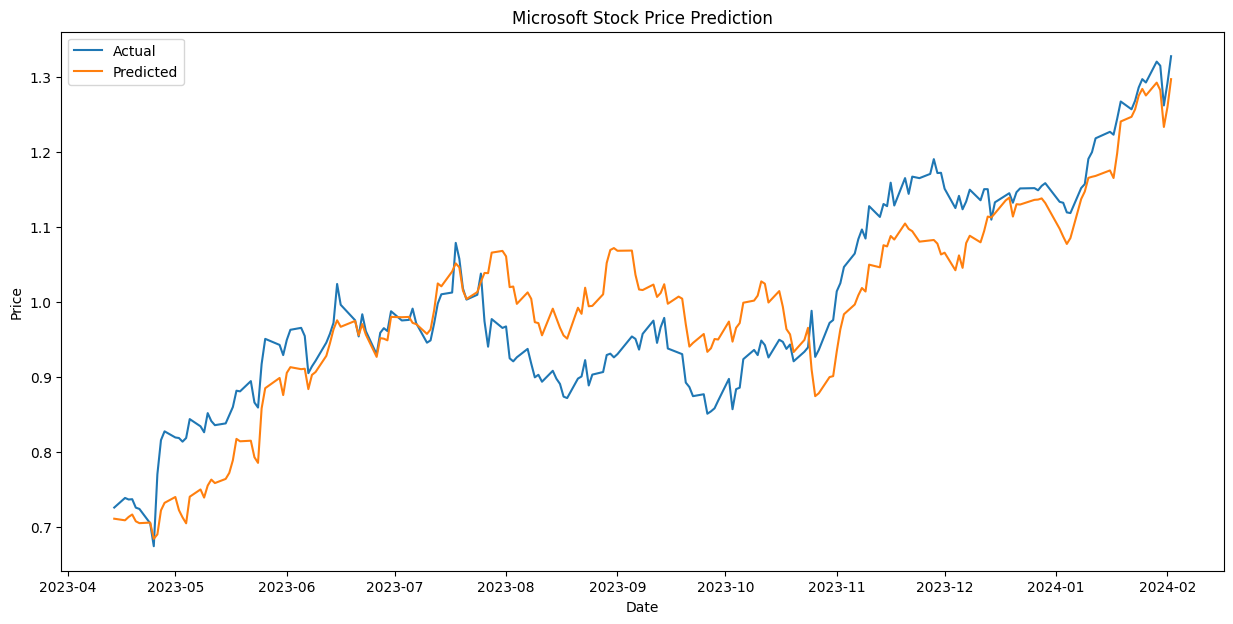

In [39]:
from ast import Lambda
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
from tensorflow.keras.metrics import MeanAbsoluteError
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.layers import Dropout


#将数据集分为训练集和测试集
train, test = train_test_split(pridictors, test_size=0.2, shuffle=False)

#将数据集分为特征和标签
X_train = train.drop('Microsoft_Price', axis=1)

y_train = train['Microsoft_Price']

X_test = test.drop('Microsoft_Price', axis=1)

y_test = test['Microsoft_Price']

#将数据集标准化
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

#将数据集转换为lstm输入格式
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

#创建lstm模型
model = Sequential([
    Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(None, 1), padding='causal'),
    Dropout(0.2),  # 添加 Dropout 层
    LSTM(64, return_sequences=True),  # 增加 LSTM 单元数
    LSTM(32),  # 添加额外的 LSTM 层
    Dense(1)
])

optimizer = Adam(learning_rate=0.001)  # 调整学习率
model.compile(optimizer=optimizer, loss='mean_squared_error')

# 模型概述
model.summary()

#拟合模型
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=10)], verbose=1)

#预测
y_pred = model.predict(X_test)

#计算评估指标
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

#绘制预测结果
plt.figure(figsize=(15, 7))

plt.plot(test.index, y_test, label='Actual')
plt.plot(test.index, y_pred, label='Predicted')

plt.title('Microsoft Stock Price Prediction')

plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()